# Assingment - Week 7
## Checking if a point in $\mathbb{R}^n$ is in the convex cone of a set of points  
Sebastian Leonardo Molina Diaz - [smolinad@unal.edu.co](smolinad@unal.edu.co)  
Universidad Nacional de Colombia

### Exercise:

Given a set of points $C=\{x_1, \dots, x_k\} \subseteq \mathbb{R}_+^n$, check if a point $b \in \mathbb{R}_+^n$ is in the convex cone of $C$.

#### Solution.

For example, we want to check if the point $(0,0,5) \in \mathbb{R}^2$ is in the convex $\operatorname{cone} C$, with $C =\{(3,1,3), (1,0,1), (0,1,1)\}$. Notice that $b \in \operatorname{cone} C$ if and only if $Ax=b$ has a solution and $x \succeq 0$, so $b$ is in the column space of the matrix $A$ defined by making every point in $C$ a column in $A$. In this case, $b$ is a conic combination of the column vectors of $A$. Also, we can use the projection matrix to check if $b$ is in the convex cone.

In [58]:
using LinearAlgebra
using Plots

function check_in_cone(points, x)
    matrix_t = reduce(vcat,transpose.(points))
    matrix = transpose(matrix_t)
    A = (matrix_t)*(matrix)
    b = matrix_t*x

    if det(A) == 0
        print(x, " is NOT in the convex cone. (i)")
    elseif det(A) != 0
        T = matrix*inv(A)*matrix_t
    end
    
    if T*x == x
        print(x, " is in the convex cone. (i)")
    end
    
    s=inv(A)*b
    if all(>=(0), s)
        print(x, " is in the convex cone. (ii)")
    else
        print(x, " is NOT in the convex cone. (ii)")
    end
    
end


(process:8408): GLib-GIO-WARNING **: 20:10:08.406: Unexpectedly, UWP app `KDEe.V.Okular_22.400.995.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


check_in_cone (generic function with 1 method)

In [59]:
points = [[3, 1, 3], [1, 0, 1], [0, 1, 1]]
x = [0, 0, 5]
check_in_cone(points, x)

[0, 0, 5] is NOT in the convex cone. (ii)

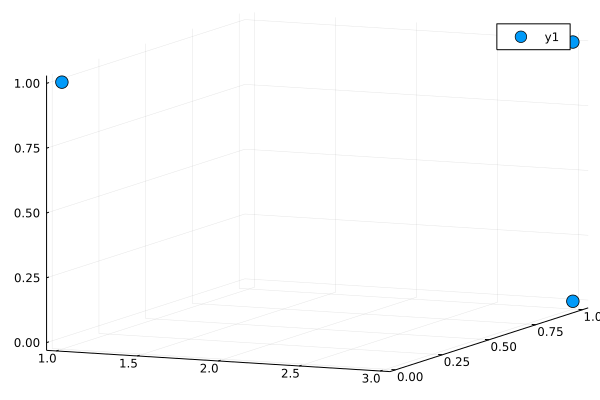

In [61]:
plot3d = plot(points[1,:],points[2,:], points[3,:],
     seriestype=:scatter, markersize = 7)
display(plot3d)
plot(plot3d,)